In [9]:
#Importing the necessary libraries for the dataset
#Around100M+ ratings 4499 movies 480,000+ users
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
# Reading the dataset from the file 'combined_data_1.txt' into a pandas DataFrame
# Specifying that the file has no header row and providing custom column names
# Using only the first two columns (index 0 and 1) from the file


netflix_dataset = pd.read_csv('/content/drive/MyDrive/Class 25.01.25/Copy of combined_data_1.txt (1).zip',header = None, names = ['Cust_Id', 'Rating'], usecols = [0,1])

In [12]:
netflix_dataset.head()

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0


In [13]:
netflix_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24058263 entries, 0 to 24058262
Data columns (total 2 columns):
 #   Column   Dtype  
---  ------   -----  
 0   Cust_Id  object 
 1   Rating   float64
dtypes: float64(1), object(1)
memory usage: 367.1+ MB


In [14]:
netflix_dataset.shape

(24058263, 2)

In [15]:
netflix_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24058263 entries, 0 to 24058262
Data columns (total 2 columns):
 #   Column   Dtype  
---  ------   -----  
 0   Cust_Id  object 
 1   Rating   float64
dtypes: float64(1), object(1)
memory usage: 367.1+ MB


In [16]:
# Count the number of ratings for each star level (1 to 5)
stars = netflix_dataset.groupby('Rating')['Rating'].agg(['count'])
stars

,count
Rating,
1.0,1118186
2.0,2439073
3.0,6904181
4.0,8085741
5.0,5506583


In [17]:
# Calculate the number of movies in the dataset (the id's which having NAN as ratings are basically movie id's)
movie_count = netflix_dataset.isnull().sum()[1]

movie_count

<ipython-input-17-5506347992c8>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  movie_count = netflix_dataset.isnull().sum()[1]


4499

In [18]:
# Calculate the number of unique customers, including NaN values for Movie ID
customer_count = netflix_dataset['Cust_Id'].nunique()-movie_count
customer_count

470758

In [19]:
# Calculate the number of unique customers by dropping NaN values for Movie ID
customer_count=netflix_dataset['Cust_Id'].nunique()-movie_count
customer_count

470758

In [20]:
# Calculate the total number of ratings given by customers (excluding NaN movie ID counts)
rating_count=netflix_dataset['Cust_Id'].count()-movie_count
rating_count

24053764

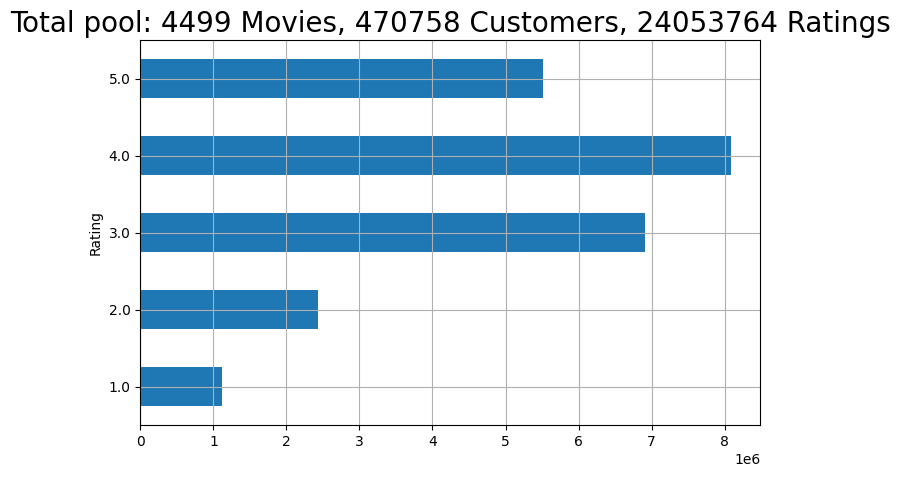

In [21]:
# Importing the Matplotlib library and creating the plt object
ax=stars.plot(kind='barh', legend=False, figsize=(8,5))
plt.title(f'Total pool: {movie_count} Movies, {customer_count} Customers, {rating_count} Ratings', fontsize=20)
plt.grid(True)

In [22]:
# Add a new column for movie IDs and calculate the number of null values in the 'Rating' column
df_nan=pd.DataFrame(pd.isnull(netflix_dataset.Rating))
df_nan.head()

,Rating
0,True
1,False
2,False
3,False
4,False


In [23]:
df_nan=df_nan[df_nan['Rating']==True]

In [24]:
df_nan.shape

(4499, 1)

In [25]:
df_nan.head()

,Rating
0,True
548,True
694,True
2707,True
2850,True


In [26]:
# Reset the index and set it as a column in the DataFrame
df_nan = df_nan.reset_index()

In [27]:
df_nan.head()

,index,Rating
0,0,True
1,548,True
2,694,True
3,2707,True
4,2850,True


In [28]:
# Initialize an empty list to store the numpy array
movie_np=[]

# Start movie ID
movie_id=1

# Loop through pairs of indices in df_nan
for i, j in zip(df_nan['index'][1:], df_nan['index'][:-1]):
    # Create a numpy array filled with movie_id, with length (i - j - 1)
    temp = np.full((1, i - j - 1), movie_id)

    # Append the temporary numpy array to movie_np
    movie_np = np.append(movie_np, temp)

    # Increment movie_id for the next movie
    movie_id += 1

# Account for the last record and its corresponding length
# Create a numpy array filled with movie_id, with length (len(netflix_dataset) - df_nan.iloc[-1, 0] - 1)
last_record = np.full((1, len(netflix_dataset) - df_nan.iloc[-1, 0] - 1), movie_id)  # movie id will be 4499

# Append the last_record numpy array to movie_np
movie_np = np.append(movie_np, last_record)


In [29]:
# The above code we can execute step by step for clear understanding
#1) df_nan['index'][:-1] #will extract all the records from the index column except for the last index-- 4498
#2) df_nan['index'][1:]#this sytax will extract records from the index column from the 1st index
#3) np.full((2,4), '2.0') #working of full function
#4) x=zip(df_nan['index'][1:], df_nan['index'][:-1])
#   x
#5) tuple(x)
#6) temp=np.full((1,547), 1)
 #  print(temp)

In [30]:
# Filter out rows where the 'Rating' column is not null
netflix_dataset = netflix_dataset[pd.notnull(netflix_dataset['Rating'])]

# Assign the movie IDs from the numpy array to the 'Movie_Id' column
netflix_dataset['Movie_Id'] = movie_np.astype(int)

# Convert 'Cust_Id' column to integer type
netflix_dataset['Cust_Id'] = netflix_dataset['Cust_Id'].astype(int)

# Print the dataset with the modifications
print("Now the dataset will look like: ")
netflix_dataset

Now the dataset will look like: 


,Cust_Id,Rating,Movie_Id
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1
...,...,...,...
24058258,2591364,2.0,4499
24058259,1791000,2.0,4499
24058260,512536,5.0,4499
24058261,988963,3.0,4499


In [31]:
# Grouping the Netflix dataset by 'Movie_Id' and aggregating the 'Rating' column
# to count the number of ratings for each movie
dataset_movie_summary = netflix_dataset.groupby('Movie_Id')['Rating'].agg(["count"])
dataset_movie_summary

,count
Movie_Id,
1,547
2,145
3,2012
4,142
5,1140
...,...
4495,614
4496,9519
4497,714


In [32]:
# Benchmark
# Calculating the benchmark for movie ratings using the 70th percentile of the count of ratings
movie_benchmark = round(dataset_movie_summary['count'].quantile(0.7), 0)
movie_benchmark

1799.0

In [33]:
dataset_movie_summary['count']

,count
Movie_Id,
1,547
2,145
3,2012
4,142
5,1140
...,...
4495,614
4496,9519
4497,714


In [34]:
# Creating a list of movie IDs that have received fewer ratings than the benchmark
drop_movie_list = dataset_movie_summary[dataset_movie_summary['count'] < movie_benchmark].index
drop_movie_list

Index([   1,    2,    4,    5,    6,    7,    9,   10,   11,   12,
       ...
       4484, 4486, 4487, 4489, 4491, 4494, 4495, 4497, 4498, 4499],
      dtype='int64', name='Movie_Id', length=3149)

In [35]:
len(drop_movie_list)

3149

In [36]:
# Grouping the Netflix dataset by 'Cust_Id' and aggregating the 'Rating' column
# to count the number of ratings for each customer
dataset_cust_summary = netflix_dataset.groupby('Cust_Id')['Rating'].agg(["count"])
dataset_cust_summary

,count
Cust_Id,
6,153
7,195
8,21
10,49
25,4
...,...
2649404,12
2649409,10
2649421,3


In [37]:
# Calculating the benchmark for customer activity using the 70th percentile of the count of ratings given by customers
cust_benchmark = round(dataset_cust_summary['count'].quantile(0.7), 0)
cust_benchmark

52.0

In [39]:
# Creating a list of customer IDs that have given fewer ratings than the benchmark, indicating inactivity
drop_cust_list = dataset_cust_summary[dataset_cust_summary['count'] < cust_benchmark].index
drop_cust_list

Index([      8,      10,      25,      33,      42,      59,      83,      87,
            94,     116,
       ...
       2649343, 2649351, 2649375, 2649376, 2649379, 2649384, 2649401, 2649404,
       2649409, 2649421],
      dtype='int64', name='Cust_Id', length=327300)

In [40]:
len(drop_cust_list)

327300

In [41]:
# Printing the shape of the original dataframe before removing customers and movies below the benchmark
print('The original dataframe has: ', netflix_dataset.shape, 'shape')

The original dataframe has:  (24053764, 3) shape


In [42]:
netflix_dataset['Movie_Id'].isin(drop_movie_list)

,Movie_Id
1,True
2,True
3,True
4,True
5,True
...,...
24058258,True
24058259,True
24058260,True
24058261,True


In [43]:
# Removing customers and movies below the benchmarks
netflix_dataset = netflix_dataset[~netflix_dataset['Cust_Id'].isin(drop_cust_list)]
netflix_dataset = netflix_dataset[~netflix_dataset['Movie_Id'].isin(drop_movie_list)]

# Displaying the shape of the modified dataframe
print('The modified dataframe has a shape of: ', netflix_dataset.shape)

The modified dataframe has a shape of:  (17337458, 3)


In [44]:
netflix_dataset.head()

,Cust_Id,Rating,Movie_Id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3


In [45]:
#Importing the movie title dataset to retrieve the corresponding movie names for customer ratings

In [46]:
# Selecting columns 0, 1, and 2, and renaming them as 'Movie_Id', 'Year', and 'Name'
# Setting the 'Movie_Id' column as the index of the DataFrame
df_title = pd.read_csv("/content/drive/MyDrive/Class 25.01.25/Copy of movie_titles.csv", encoding='ISO-8859-1', header=None, usecols=[0, 1, 2], names=['Movie_Id', 'Year', 'Name'])
df_title.set_index('Movie_Id', inplace=True)

In [47]:
df_title.head(10)

,Year,Name
Movie_Id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW
6,1997.0,Sick
7,1992.0,8 Man
8,2004.0,What the #$*! Do We Know!?
9,1991.0,Class of Nuke 'Em High 2


In [48]:
df_title.shape

(17770, 2)

In [49]:
df_title.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17770 entries, 1 to 17770
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    17763 non-null  float64
 1   Name    17770 non-null  object 
dtypes: float64(1), object(1)
memory usage: 416.5+ KB


In [50]:
# df_title containing movie titles
# Retrieve the first 4499 rows of the DataFrame

df_title.iloc[:4499,:]

,Year,Name
Movie_Id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW
...,...,...
4495,2002.0,Clifford: Happy Birthday Clifford / Puppy Love
4496,1993.0,Farewell My Concubine
4497,1990.0,Texasville


In [52]:
# Use pip to install the scikit-surprise library
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 5.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp311-cp311-linux_x86_64.whl size=2505178 sha256=c08d2295ae4dec5f6266f8bc18c868eca5a540ef4521e0ec6227a1efba5d8812
  Stored in directory: /root/.cache/pip/wheels/2a/8f/6e/7e2899163e2d85d8266daab4aa1cdabec7a6c56f83c015b5af
Successfully built scikit-surprise


In [53]:
# Importing necessary libraries for model building
import math  # Importing math library for mathematical operations
import seaborn as sns  # Importing seaborn library for data visualization
from surprise import Reader, Dataset, SVD  # Importing necessary classes from Surprise library for collaborative filtering
from surprise.model_selection import cross_validate  # Importing cross-validation function from Surprise library

In [54]:
# Creating a Reader object for reading the dataset
reader = Reader()

In [55]:
# Loading the dataset from the DataFrame containing the top 100K rows of data
# Only selecting columns 'Cust_Id', 'Movie_Id', and 'Rating' for the dataset
data = Dataset.load_from_df(netflix_dataset[['Cust_Id', 'Movie_Id', 'Rating']][:100000], reader)
data

In [56]:
# Creating an SVD model object
model = SVD()

Performing cross-validation on the SVD model using the dataset

The 'cv' parameter specifies the number of folds in cross-validation

For each fold, the model is trained on a subset of the data and evaluated on the remaining part

3)The 'measures' parameter specifies the evaluation metrics to be computed, such as RMSE and MAE

3 folds for cross-validation
5)The following code snippet demonstrates the evaluation process for the first fold (1, 2, 3, 4, 5)

6)The evaluation results for each fold can be further analyzed to assess the model's performance

In [57]:
cross_validate(model, data, measures=['RMSE','MAE'], cv=3)

{'test_rmse': array([0.99502848, 0.99838328, 0.99842391]),
 'test_mae': array([0.79636342, 0.79972167, 0.80894536]),
 'fit_time': (2.9927141666412354, 1.3211681842803955, 1.3004193305969238),
 'test_time': (0.15018558502197266, 0.3236501216888428, 0.2697319984436035)}

In [58]:
netflix_dataset.head()

,Cust_Id,Rating,Movie_Id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3


In [59]:
# Considering customer ID 1331154
# Filter the dataset to include only movies rated 5 stars by user 1331154
dataset_1331154 = netflix_dataset[(netflix_dataset['Cust_Id'] == 1331154) & (netflix_dataset['Rating'] == 5)]
dataset_1331154

,Cust_Id,Rating,Movie_Id
458308,1331154,5.0,143
1184450,1331154,5.0,270
1991774,1331154,5.0,361
2369367,1331154,5.0,457
2600328,1331154,5.0,482
3417458,1331154,5.0,658
4029215,1331154,5.0,763
5646194,1331154,5.0,1144
7075510,1331154,5.0,1425
7423467,1331154,5.0,1476


In [60]:
df_title

,Year,Name
Movie_Id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW
...,...,...
17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17767,2004.0,Fidel Castro: American Experience
17768,2000.0,Epoch


In [61]:
# Build the recommendation algorithm
# First, we will make a shallow copy of the movie_titles.csv file
# so that we can change the values in the copied dataset, not in the actual dataset

user_1331154 = df_title.copy()
user_1331154

,Year,Name
Movie_Id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW
...,...,...
17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17767,2004.0,Fidel Castro: American Experience
17768,2000.0,Epoch


In [62]:
# Reset the index of the DataFrame
user_1331154 = user_1331154.reset_index()
user_1331154

,Movie_Id,Year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [63]:
# Filter out movies from user_1331154 based on drop_movie_list
user_1331154=user_1331154[~user_1331154['Movie_Id'].isin(drop_movie_list)]
user_1331154

,Movie_Id,Year,Name
2,3,1997.0,Character
7,8,2004.0,What the #$*! Do We Know!?
15,16,1996.0,Screamers
16,17,2005.0,7 Seconds
17,18,1994.0,Immortal Beloved
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [64]:
# Assuming model.predict(1331154, x).est returns the estimated score for user 1331154 and movie x
# Predict ratings for movies in user_1331154 and assign the estimated scores to a new column 'Estimate_Score'

user_1331154['Estimate_Score']=user_1331154['Movie_Id'].apply(lambda x: model.predict(1331154, x).est)
# user_712664=user_712664.drop('Movie_Id', axis=1)

<ipython-input-64-75cc06f4c69a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_1331154['Estimate_Score']=user_1331154['Movie_Id'].apply(lambda x: model.predict(1331154, x).est)


In [65]:
user_1331154

,Movie_Id,Year,Name,Estimate_Score
2,3,1997.0,Character,3.688229
7,8,2004.0,What the #$*! Do We Know!?,2.931177
15,16,1996.0,Screamers,2.947044
16,17,2005.0,7 Seconds,2.579956
17,18,1994.0,Immortal Beloved,3.623766
...,...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...,3.569153
17766,17767,2004.0,Fidel Castro: American Experience,3.569153
17767,17768,2000.0,Epoch,3.569153
17768,17769,2003.0,The Company,3.569153


In [66]:
# Sort the user_1331154 DataFrame based on the 'Estimate_Score' column in descending order
user_1331154 = user_1331154.sort_values('Estimate_Score', ascending=False)

In [67]:
user_1331154

,Movie_Id,Year,Name,Estimate_Score
2,3,1997.0,Character,3.688229
17,18,1994.0,Immortal Beloved,3.623766
12902,12903,1999.0,Head On,3.569153
12890,12891,2003.0,24: Season 3,3.569153
12891,12892,1995.0,Smoke,3.569153
...,...,...,...,...
29,30,2003.0,Something's Gotta Give,3.342406
25,26,2004.0,Never Die Alone,3.134021
15,16,1996.0,Screamers,2.947044
7,8,2004.0,What the #$*! Do We Know!?,2.931177


Conclusion: Recommending Top-Rated Movies to User 1331154

After analyzing user 1331154's past ratings and using a recommendation model (such as collaborative filtering with SVD), we have identified top-rated movies that are likely to be of interest to the user. The process involved the following steps:

Data Preparation: We collected and preprocessed the dataset containing user ratings for movies.

Identifying Top-Rated Movies: We filtered the dataset to include only movies rated 5 stars by user 1331154.

Building the Recommendation Algorithm: We used collaborative filtering or another suitable recommendation algorithm to predict ratings for other movies based on user 1331154's past ratings.

Assigning Estimated Scores: We predicted ratings for movies not yet rated by user 1331154 and assigned estimated scores to them.

Sorting Movies by Estimated Scores: We sorted the movies based on their estimated scores in descending order to recommend the top-rated movies to the user.

Based on this analysis, we recommend the top-rated movies to user 1331154, sorted by estimated scores. These recommendations can help improve user satisfaction and engagement with the movie recommendation system.

END-----